In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

# Univariate Analysis

In [4]:
df.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [5]:
columns = df.columns.tolist()

print(columns)


['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


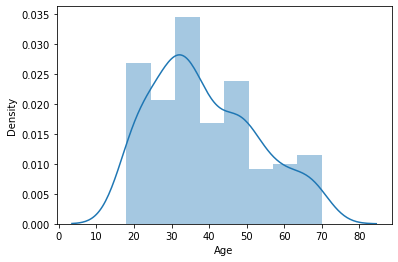

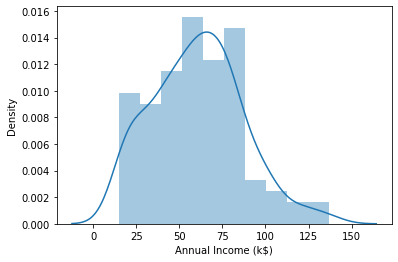

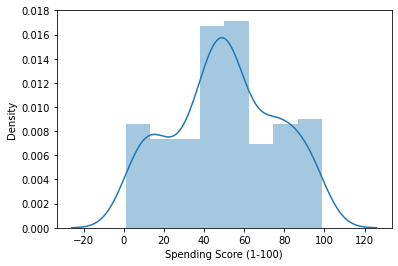

In [6]:
for i in range(2, len(columns)):
    plt.figure()
    sns.distplot(df[columns[i]])

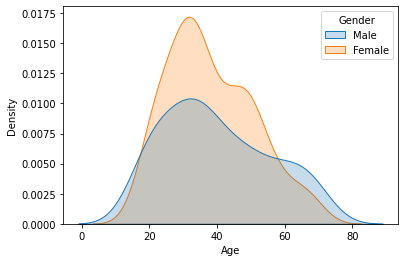

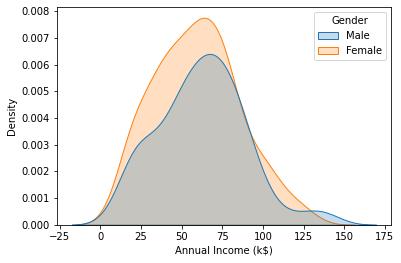

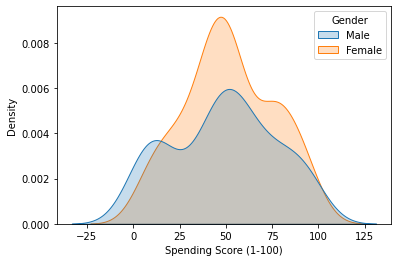

In [7]:
for i in range(2, len(columns)):
    plt.figure()
    sns.kdeplot(df[columns[i]], shade=True, hue=df['Gender'])

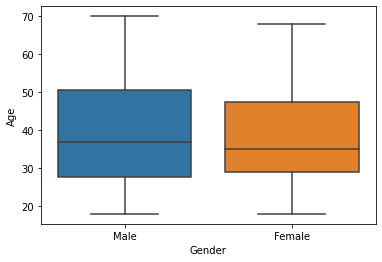

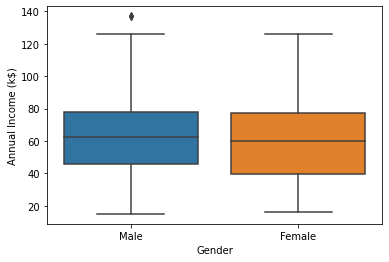

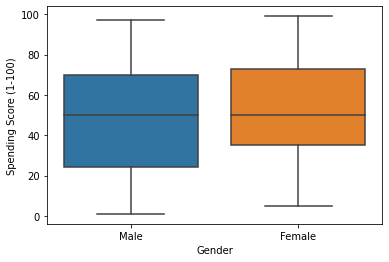

In [8]:
for i in range(2, len(columns)):
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[columns[i]])

In [9]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64


# Bivariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

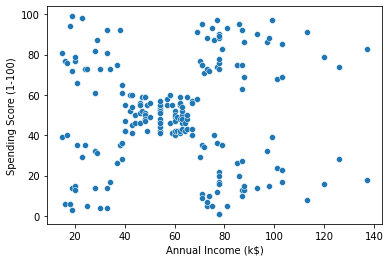

In [10]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

In [11]:
df = df.drop('CustomerID', axis=1) # no need to plot for Customer ID column
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

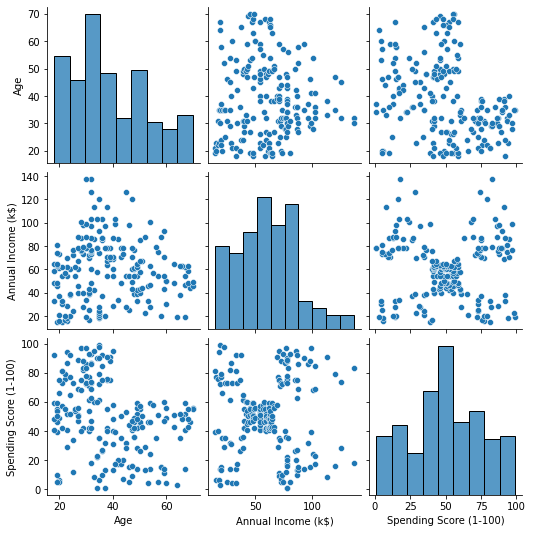

In [12]:
sns.pairplot(df)

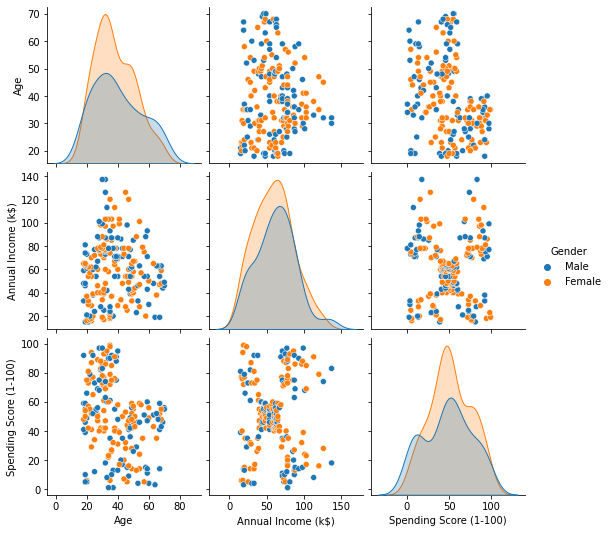

In [13]:
sns.pairplot(df, hue='Gender')

In [14]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364

In [15]:
df.corr()

Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000

<AxesSubplot:>

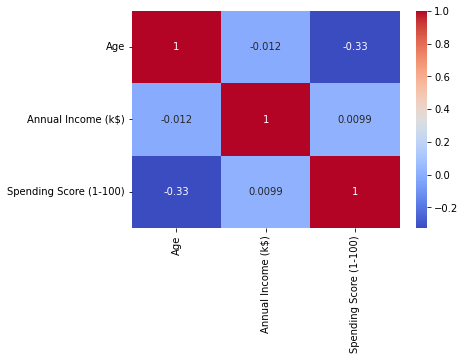

In [16]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [17]:
inertia_scores = []

In [18]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)


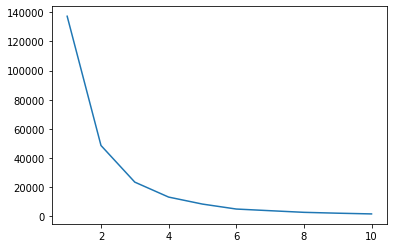

In [19]:
plt.plot(range(1,11), inertia_scores)

In [20]:
# from the inertia score plot, we know the best cluster number is 3

In [21]:
# Univariate Clustering

In [22]:
clustering1 = KMeans(n_clusters=3)  

In [23]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [24]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [25]:
df['Income Cluster'] = clustering1.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster
0    Male   19                  15                      39               1
1    Male   21                  15                      81               1
2  Female   20                  16                       6               1
3  Female   23                  16                      77               1
4  Female   31                  17                      40               1

In [26]:
df['Income Cluster'].value_counts()

2    90
1    74
0    36
Name: Income Cluster, dtype: int64

In [27]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Income Cluster                                                       
0               37.833333           99.888889               50.638889
1               39.500000           33.486486               50.229730
2               38.722222           67.088889               50.000000

In [28]:
# Bivariate Clustering

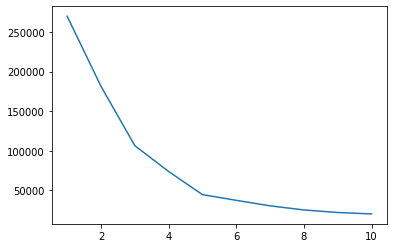

In [29]:
inertia_scores2 = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11), inertia_scores2)

In [30]:
# the cluster number for bivariate clustering will be set to 5

In [31]:
clustering2 = KMeans(n_clusters=5)  
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               1   
1    Male   21                  15                      81               1   
2  Female   20                  16                       6               1   
3  Female   23                  16                      77               1   
4  Female   31                  17                      40               1   

   Spending and Income Cluster  
0                            2  
1                            0  
2                            2  
3                            0  
4                            2

In [32]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']
centers.head()


x          y
0  25.727273  79.363636
1  55.296296  49.518519
2  26.304348  20.913043
3  86.538462  82.128205
4  88.200000  17.114286

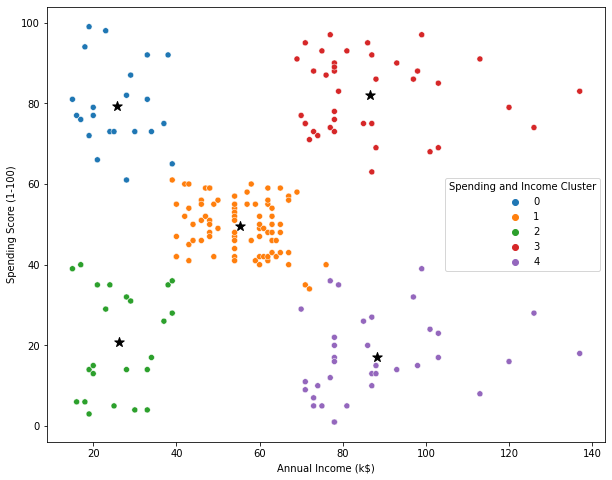

In [33]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariate.png')

In [34]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender                         Female      Male
Spending and Income Cluster                    
0                            0.590909  0.409091
1                            0.592593  0.407407
2                            0.608696  0.391304
3                            0.538462  0.461538
4                            0.457143  0.542857

In [35]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

Age  Annual Income (k$)  \
Spending and Income Cluster                                  
0                            25.272727           25.727273   
1                            42.716049           55.296296   
2                            45.217391           26.304348   
3                            32.692308           86.538462   
4                            41.114286           88.200000   

                             Spending Score (1-100)  
Spending and Income Cluster                          
0                                         79.363636  
1                                         49.518519  
2                                         20.913043  
3                                         82.128205  
4                                         17.114286

In [36]:
# Multivariate clustering
from sklearn.preprocessing import StandardScaler

In [37]:
scale = StandardScaler()

In [38]:
df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0    Male   19                  15                      39               1   
1    Male   21                  15                      81               1   
2  Female   20                  16                       6               1   
3  Female   23                  16                      77               1   
4  Female   31                  17                      40               1   

   Spending and Income Cluster  
0                            2  
1                            0  
2                            2  
3                            0  
4                            2

In [39]:
dff = pd.get_dummies(df, drop_first=True) # turn the Gender column into numerical values
dff.head() 

Age  Annual Income (k$)  Spending Score (1-100)  Income Cluster  \
0   19                  15                      39               1   
1   21                  15                      81               1   
2   20                  16                       6               1   
3   23                  16                      77               1   
4   31                  17                      40               1   

   Spending and Income Cluster  Gender_Male  
0                            2            1  
1                            0            1  
2                            2            0  
3                            0            0  
4                            2            0

In [40]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [41]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0   19                  15                      39            1
1   21                  15                      81            1
2   20                  16                       6            0
3   23                  16                      77            0
4   31                  17                      40            0

In [42]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

0         1         2         3
0 -1.424569 -1.738999 -0.434801  1.128152
1 -1.281035 -1.738999  1.195704  1.128152
2 -1.352802 -1.700830 -1.715913 -0.886405
3 -1.137502 -1.700830  1.040418 -0.886405
4 -0.563369 -1.662660 -0.395980 -0.886405

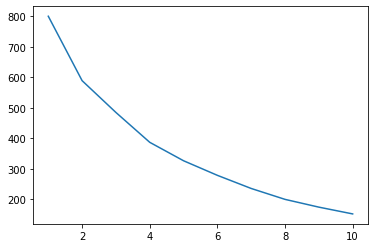

In [43]:
inertia_scores3 = []

for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)

plt.plot(range(1,11), inertia_scores3)

In [44]:
# the cluster number will be set to 6

clustering3 = KMeans(n_clusters=6)  
clustering3.fit(dff)
dff['Cluster'] = clustering3.labels_
dff.head()

0         1         2         3  Cluster
0 -1.424569 -1.738999 -0.434801  1.128152        4
1 -1.281035 -1.738999  1.195704  1.128152        4
2 -1.352802 -1.700830 -1.715913 -0.886405        1
3 -1.137502 -1.700830  1.040418 -0.886405        1
4 -0.563369 -1.662660 -0.395980 -0.886405        1

In [45]:
centers = pd.DataFrame(clustering3.cluster_centers_)
centers.columns = ['x', 'y', 'z', 't']
centers.head()

x         y         z         t
0 -0.441917  0.991583  1.239503  0.043390
1 -0.926081 -0.700172  0.281824 -0.886405
2  0.816509 -0.346683 -0.458624 -0.886405
3  0.062734  1.155296 -1.264780  0.433477
4 -1.022051 -0.758211  0.437840  1.128152

In [46]:
dff[0].tolist()

[-1.4245687900521393,
 -1.2810354107017978,
 -1.3528021003769686,
 -1.1375020313514563,
 -0.5633685139500905,
 -1.209268721026627,
 -0.2763017552494075,
 -1.1375020313514563,
 1.804932245330544,
 -0.6351352036252612,
 2.0202323143560563,
 -0.2763017552494075,
 1.3743321072795196,
 -1.0657353416762856,
 -0.13276837589906598,
 -1.209268721026627,
 -0.2763017552494075,
 -1.3528021003769686,
 0.9437319692284951,
 -0.2763017552494075,
 -0.2763017552494075,
 -0.9939686520011148,
 0.5131318311774707,
 -0.5633685139500905,
 1.0872653485788366,
 -0.706901893300432,
 0.44136514150229994,
 -0.2763017552494075,
 0.08253169312644625,
 -1.1375020313514563,
 1.517865486629861,
 -1.2810354107017978,
 1.0154986589036659,
 -1.49633547972731,
 0.728431900202983,
 -1.2810354107017978,
 0.22606507247678773,
 -0.6351352036252612,
 -0.20453506557423673,
 -1.3528021003769686,
 1.8766989350057148,
 -1.0657353416762856,
 0.6566652105278122,
 -0.5633685139500905,
 0.728431900202983,
 -1.0657353416762856,
 0.8001

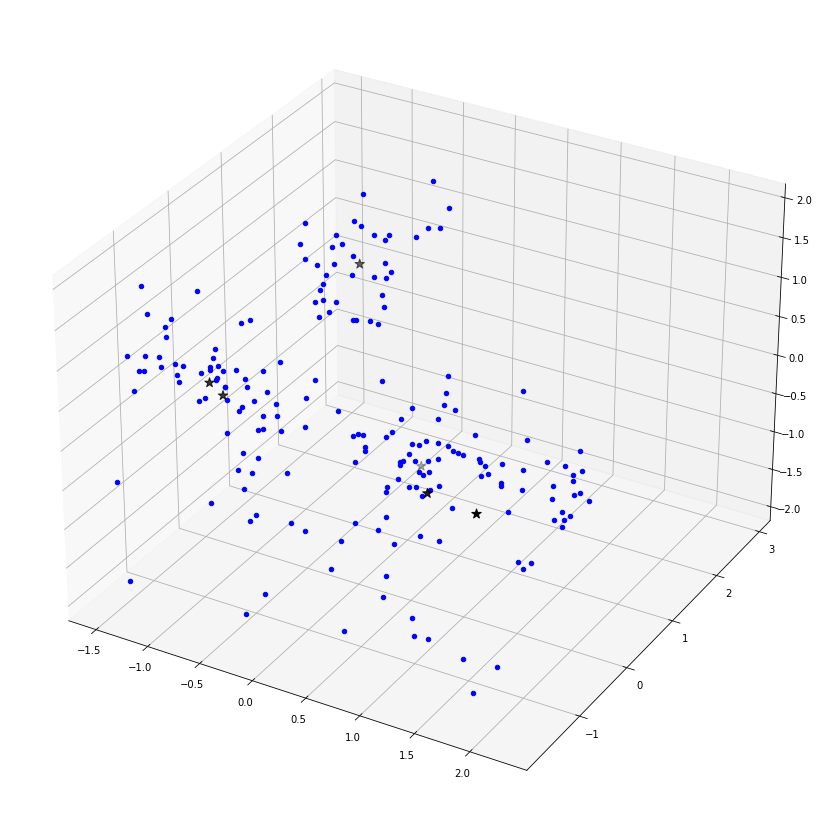

In [48]:
#plt.figure(figsize=(10,8))
#plt.scatter(x=centers['x'], y=centers['y'], s=100, c='black', marker='*')
#sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
  #              hue='Spending and Income Cluster', palette='tab10')
#plt.savefig('clustering_bivariate.png')

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=centers['x'], ys=centers['y'], zs=centers['z'], s=100, c='black', marker='*')

age_list = dff[0].tolist()
income_list = dff[1].tolist()
spending_score_list = dff[2].tolist()

for i in range(0, len(age_list) ):
    xs = age_list[i]
    ys = income_list[i]
    zs = spending_score_list[i]
    ax.scatter(xs, ys, zs, c='blue')
    
plt.savefig('clustering_multivariate.png')
plt.show()